Error processing Athens, Greece: Nominatim did not geocode query 'Athens, Greece' to a geometry of type (Multi)Polygon.


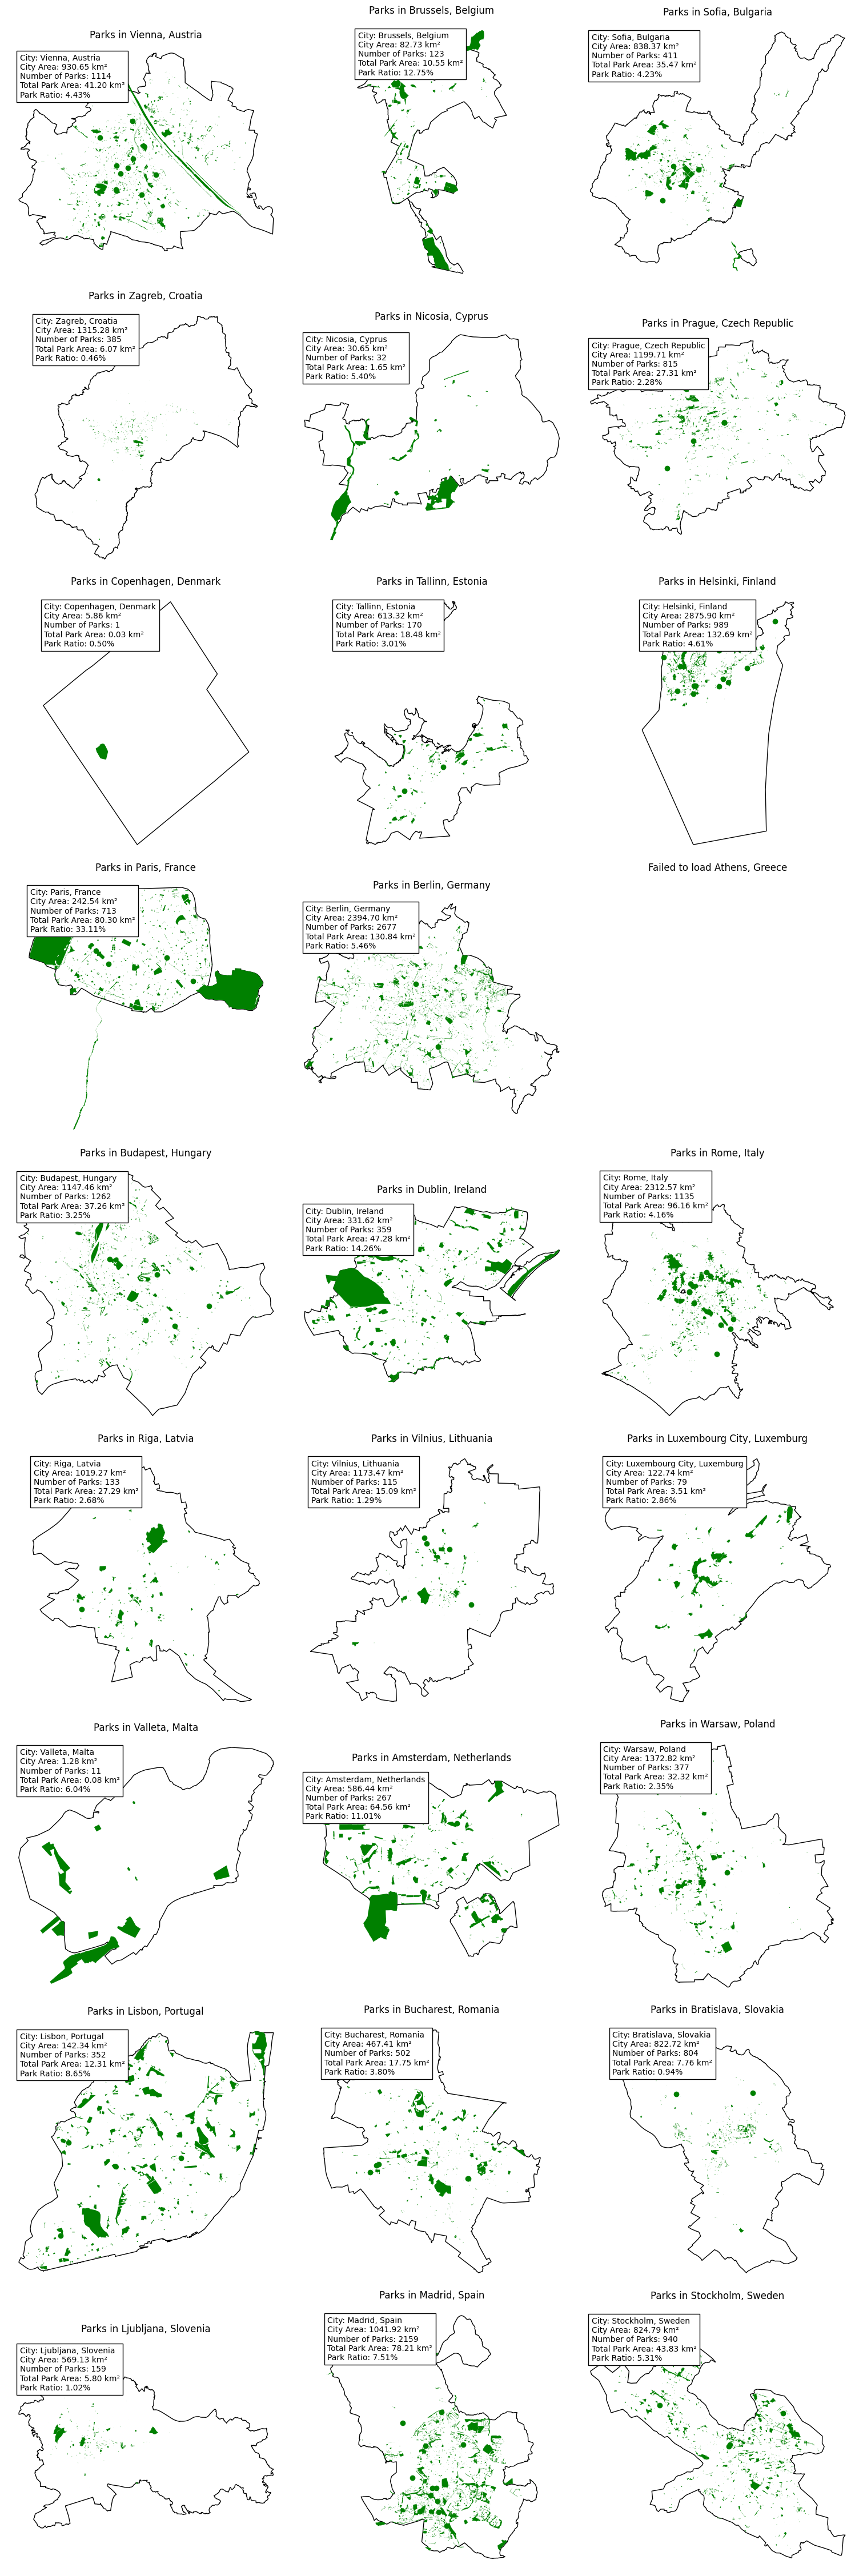

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

def plot_parks(city_list, cols=3): 
    num_cities = len(city_list)
    rows = (num_cities // cols) + (num_cities % cols > 0)  # Calculate required rows dynamically

    # Create figure and axes
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows), constrained_layout=True)
    axes = axes.flatten()  # Flatten in case of multi-dimensional array

    for i, city in enumerate(city_list):
        try:
            ax = axes[i]

            # Get city boundary
            gdf_city = ox.geocode_to_gdf(city)
            city_area_km2 = gdf_city.to_crs(epsg=3395).geometry.area.iloc[0] / 1e6  # Convert to km²

            # Get parks
            gdf_parks = ox.features_from_place(city, tags={"leisure": "park"})

            # Compute park stats
            num_parks = len(gdf_parks)
            park_area_km2 = gdf_parks.to_crs(epsg=3395).geometry.area.sum() / 1e6  # Convert to km²        

            # Plot city boundaries
            gdf_city.plot(ax=ax, facecolor="white", edgecolor="k")

            # Plot parks
            gdf_parks.plot(ax=ax, color="green")

            # Add city info as text
            info_text = (
                f"City: {city}\n"
                f"City Area: {city_area_km2:.2f} km²\n"
                f"Number of Parks: {num_parks}\n"
                f"Total Park Area: {park_area_km2:.2f} km²\n"
                f"Park Ratio: {park_area_km2 / city_area_km2:.2%}"
            )
            ax.text(0.05, 0.95, info_text, fontsize=10, va="top",
                    bbox=dict(facecolor="white", edgecolor="black", boxstyle='round,pad=0.5'), transform=ax.transAxes)

            # Formatting
            ax.set_title(f"Parks in {city}", fontsize=12)
            ax.axis("off")

        except Exception as e:
            print(f"Error processing {city}: {e}")
            ax.set_title(f"Failed to load {city}", fontsize=12)
            ax.axis("off")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.show()

city_list = [
    "Vienna, Austria", 
    "Brussels, Belgium", 
    "Sofia, Bulgaria", 
    "Zagreb, Croatia", 
    "Nicosia, Cyprus", 
    "Prague, Czech Republic", 
    "Copenhagen, Denmark", 
    "Tallinn, Estonia", 
    "Helsinki, Finland", 
    "Paris, France", 
    "Berlin, Germany",  
    "Athens, Greece", 
    "Budapest, Hungary",  
    "Dublin, Ireland", 
    "Rome, Italy",  
    "Riga, Latvia", 
    "Vilnius, Lithuania", 
    "Luxembourg City, Luxemburg", 
    "Valleta, Malta", 
    "Amsterdam, Netherlands", 
    "Warsaw, Poland", 
    "Lisbon, Portugal",
    "Bucharest, Romania", 
    "Bratislava, Slovakia", 
    "Ljubljana, Slovenia", 
    "Madrid, Spain", 
    "Stockholm, Sweden" 
]
plot_parks(city_list, cols=3)  # Adjust `cols` as needed

Error processing Athens, Greece: Nominatim did not geocode query 'Athens, Greece' to a geometry of type (Multi)Polygon.


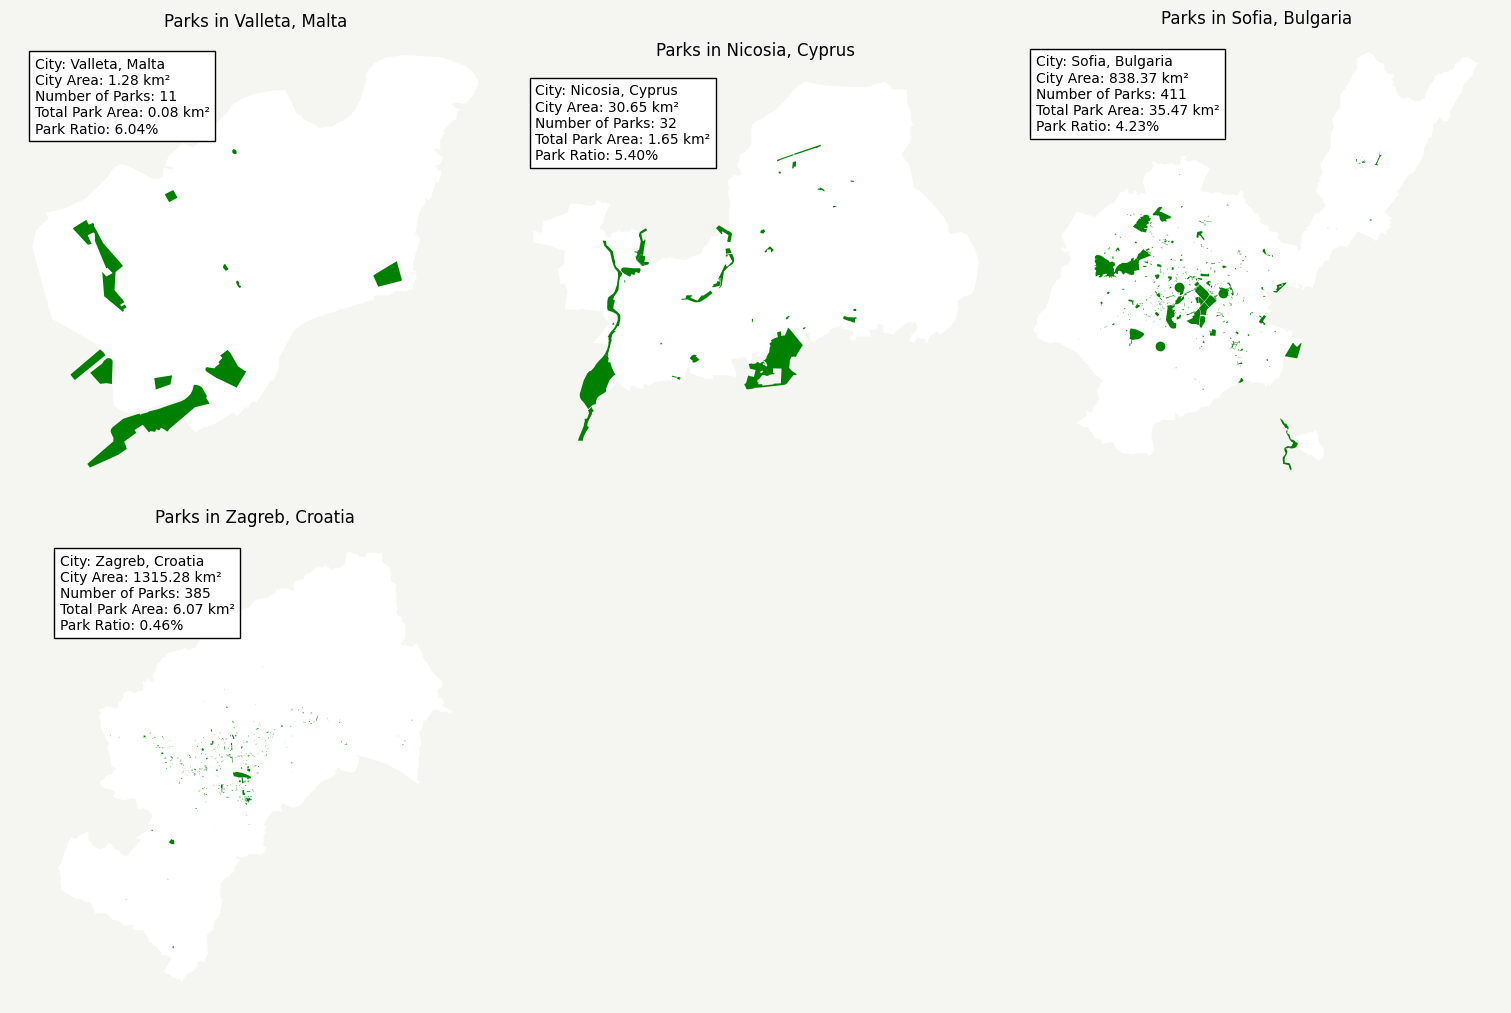

In [9]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

def plot_parks(city_list, cols=3): 
    city_data = []

    # Collect data for each city
    for city in city_list:
        try:
            # Get city boundary
            gdf_city = ox.geocode_to_gdf(city)
            gdf_city = gdf_city.to_crs(epsg=3395)  # Convert CRS for area calculation
            city_area_km2 = gdf_city.geometry.area.iloc[0] / 1e6  # Convert to km²

            # Get parks and filter by city boundary
            gdf_parks = ox.features_from_place(city, tags={"leisure": "park"})
            gdf_parks = gdf_parks.to_crs(epsg=3395)  # Convert CRS for area calculations
            gdf_parks = gdf_parks[gdf_parks.geometry.intersects(gdf_city.geometry.iloc[0])]  # Filter parks

            # Compute park stats
            num_parks = len(gdf_parks)
            park_area_km2 = gdf_parks.geometry.area.sum() / 1e6  # Convert to km²
            park_ratio = park_area_km2 / city_area_km2 if city_area_km2 > 0 else 0  # Avoid division by zero

            city_data.append((city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio))

        except Exception as e:
            print(f"Error processing {city}: {e}")

    # Sort cities by park ratio (highest first)
    city_data.sort(key=lambda x: x[-1], reverse=True)

    # Determine grid layout
    num_cities = len(city_data)
    rows = (num_cities // cols) + (num_cities % cols > 0)  # Dynamic row calculation

    # Create figure and axes
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows), constrained_layout=True)
    axes = axes.flatten()  # Flatten to handle indexing easily

    for i, (city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio) in enumerate(city_data):
        ax = axes[i]

        # Plot city boundaries
        gdf_city.plot(ax=ax, facecolor="white")

        # Plot parks
        gdf_parks.plot(ax=ax, color="green")

        # Add city info as text
        info_text = (
            f"City: {city}\n"
            f"City Area: {city_area_km2:.2f} km²\n"
            f"Number of Parks: {num_parks}\n"
            f"Total Park Area: {park_area_km2:.2f} km²\n"
            f"Park Ratio: {park_ratio:.2%}"
        )
        ax.text(0.05, 0.95, info_text, fontsize=10, va="top",
                bbox=dict(facecolor="white", edgecolor="k"), transform=ax.transAxes)

        # Formatting
        ax.set_title(f"Parks in {city}", fontsize=12)
        ax.axis("off")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    fig.set_facecolor("#f5f5f1")

    plt.show()

city_list = [
    "Sofia, Bulgaria", 
    "Zagreb, Croatia", 
    "Nicosia, Cyprus", 
    "Athens, Greece", 
    "Valleta, Malta",    
]

plot_parks(city_list, cols=3)  # Adjust `cols` as needed

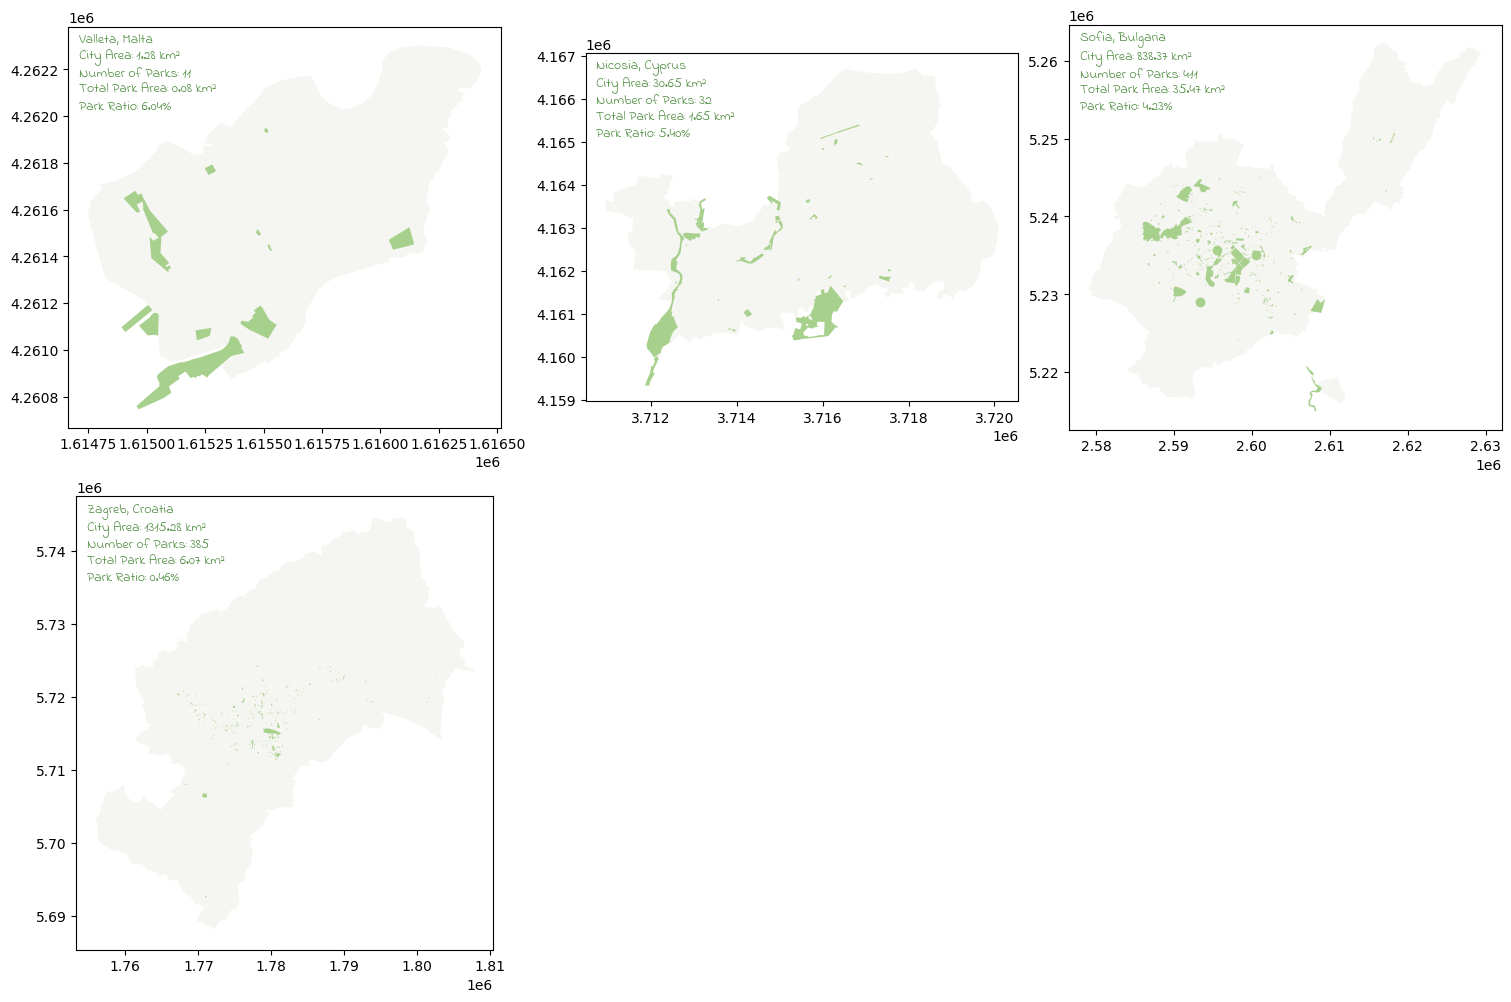

In [5]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

from pyfonts import load_font
#from highlight_text import fig_text, ax_text

font = load_font("https://github.com/google/fonts/blob/main/ofl/indieflower/IndieFlower-Regular.ttf?raw=true")

def plot_parks(city_list, cols=3): 
    city_data = []

    # Collect data for each city
    for city in city_list:
        try:
            # Get city boundary
            gdf_city = ox.geocode_to_gdf(city)
            gdf_city = gdf_city.to_crs(epsg=3395)  # Convert CRS for area calculation
            city_area_km2 = gdf_city.geometry.area.iloc[0] / 1e6  # Convert to km²

            # Get parks and filter by city boundary
            gdf_parks = ox.features_from_place(city, tags={"leisure": "park"})
            gdf_parks = gdf_parks.to_crs(epsg=3395)  # Convert CRS for area calculations
            gdf_parks = gdf_parks[gdf_parks.geometry.intersects(gdf_city.geometry.iloc[0])]  # Filter parks

            # Compute park stats
            num_parks = len(gdf_parks)
            park_area_km2 = gdf_parks.geometry.area.sum() / 1e6  # Convert to km²
            park_ratio = park_area_km2 / city_area_km2 if city_area_km2 > 0 else 0  # Avoid division by zero

            city_data.append((city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio))

        except Exception as e:
            print(f"Error processing {city}: {e}")

    # Sort cities by park ratio (highest first)
    city_data.sort(key=lambda x: x[-1], reverse=True)

    # Determine grid layout
    num_cities = len(city_data)
    rows = (num_cities // cols) + (num_cities % cols > 0)  # Dynamic row calculation

    # Create figure and axes
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows), constrained_layout=True)
    axes = axes.flatten()  # Flatten to handle indexing easily

    for i, (city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio) in enumerate(city_data):
        ax = axes[i]

        # Plot city boundaries
        gdf_city.plot(ax=ax, facecolor="#f5f5f1")

        # Plot parks
        gdf_parks.plot(ax=ax, color="#A8D08D")

        # Add city info as text
        info_text = (
            f"{city}\n"
            f"City Area: {city_area_km2:.2f} km²\n"
            f"Number of Parks: {num_parks}\n"
            f"Total Park Area: {park_area_km2:.2f} km²\n"
            f"Park Ratio: {park_ratio:.2%}"
        )
        ax.text(0.025, 0.985, s=info_text, font=font, color="#4B8A3D", weight="bold", va="top", transform=ax.transAxes)
                
        # Formatting
        #ax.set_title(f"Parks in {city}", fontsize=12)
        #ax.set_title(info_text)
        #ax.axis("off")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)    

    plt.show()

city_list = [
    "Sofia, Bulgaria", 
    "Zagreb, Croatia", 
    "Nicosia, Cyprus", 
    #"Athens, Greece", 
    "Valleta, Malta",    
]

plot_parks(city_list, cols=3)  # Adjust `cols` as needed

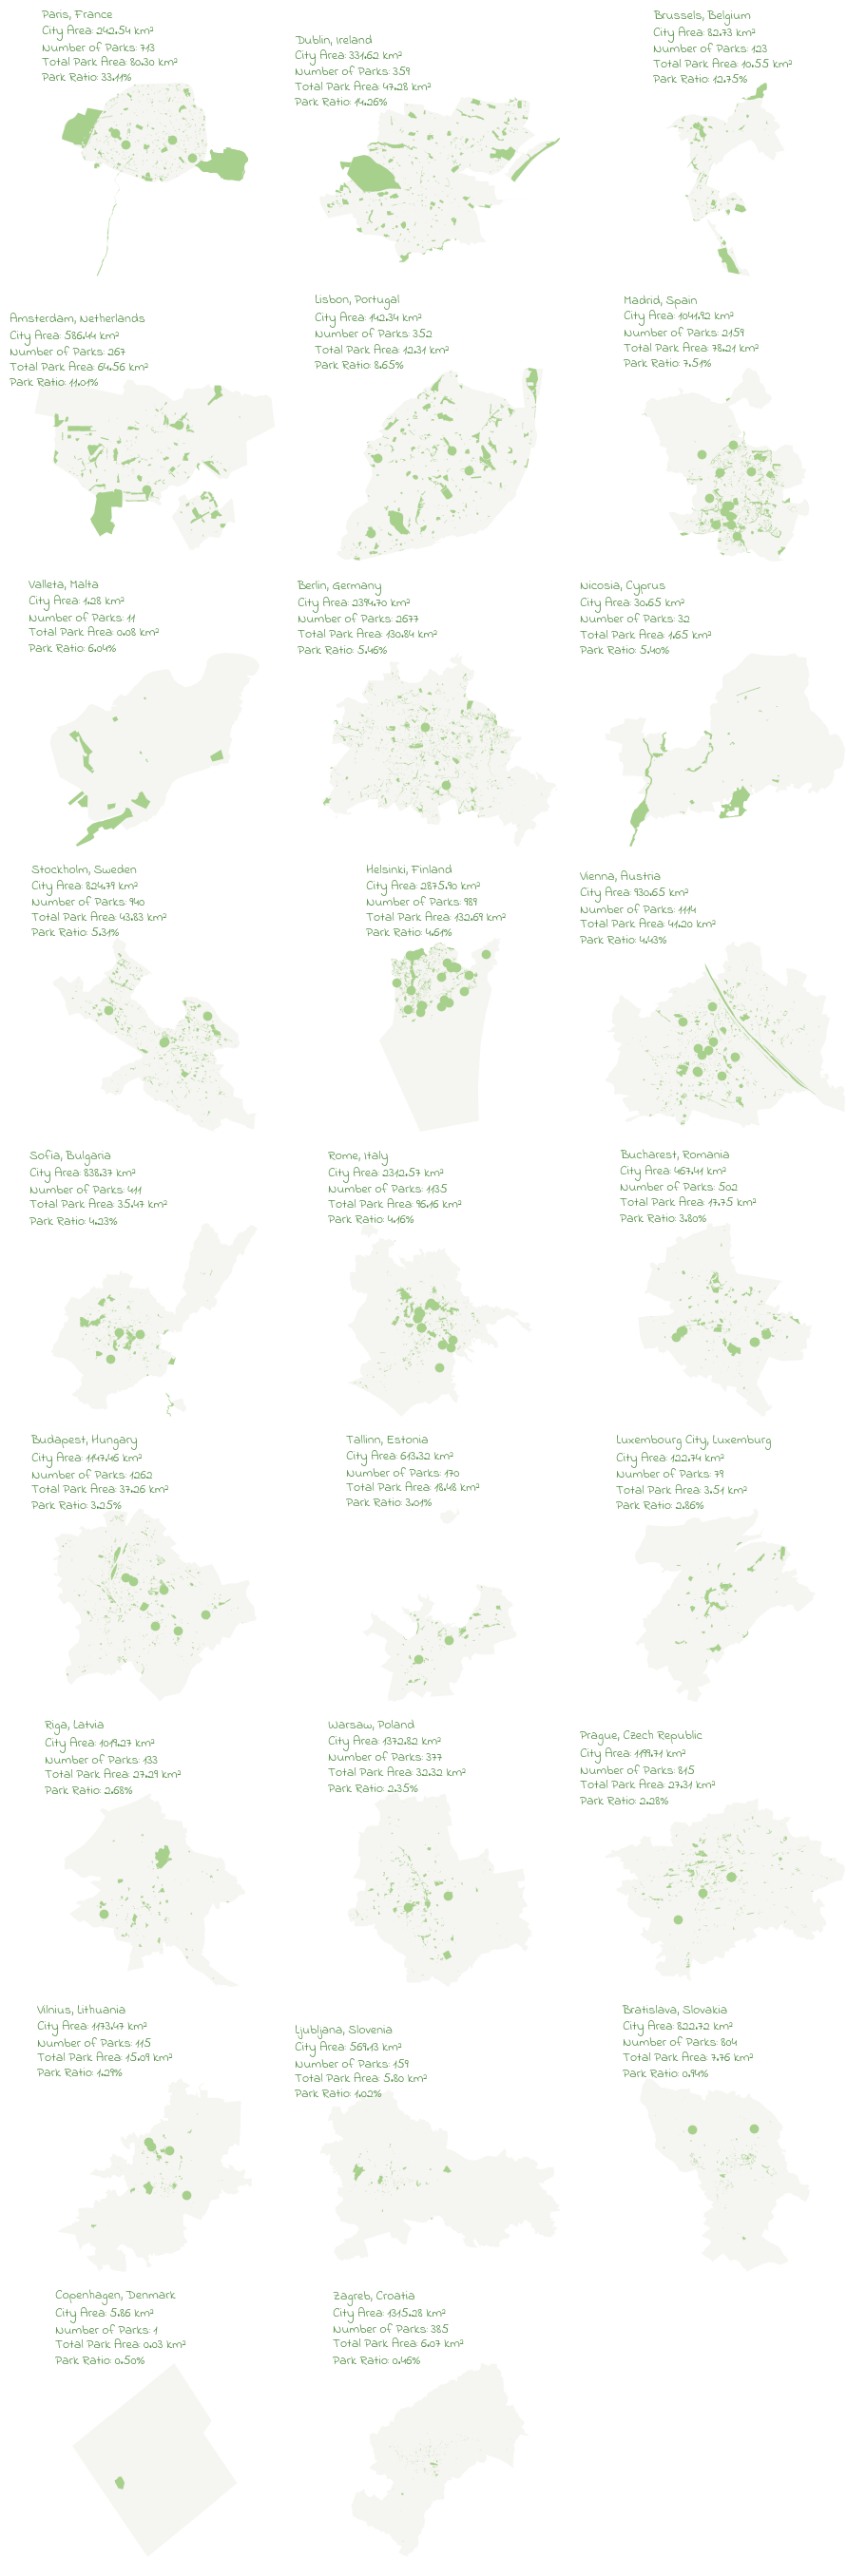

In [9]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

def plot_parks(city_list, cols=3): 
    city_data = []

    # Collect data for each city
    for city in city_list:
        try:
            # Get city boundary
            gdf_city = ox.geocode_to_gdf(city)
            gdf_city = gdf_city.to_crs(epsg=3395)  # Convert CRS for area calculation
            city_area_km2 = gdf_city.geometry.area.iloc[0] / 1e6  # Convert to km²

            # Get parks and filter by city boundary
            gdf_parks = ox.features_from_place(city, tags={"leisure": "park"})
            gdf_parks = gdf_parks.to_crs(epsg=3395)  # Convert CRS for area calculations
            gdf_parks = gdf_parks[gdf_parks.geometry.intersects(gdf_city.geometry.iloc[0])]  # Filter parks

            # Compute park stats
            num_parks = len(gdf_parks)
            park_area_km2 = gdf_parks.geometry.area.sum() / 1e6  # Convert to km²
            park_ratio = park_area_km2 / city_area_km2 if city_area_km2 > 0 else 0  # Avoid division by zero

            city_data.append((city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio))

        except Exception as e:
            print(f"Error processing {city}: {e}")

    # Sort cities by park ratio (highest first)
    city_data.sort(key=lambda x: x[-1], reverse=True)

    # Determine grid layout
    num_cities = len(city_data)
    rows = (num_cities // cols) + (num_cities % cols > 0)  # Dynamic row calculation

    # Create figure and axes
    fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows), constrained_layout=True)
    axes = axes.flatten()  # Flatten to handle indexing easily

    for i, (city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio) in enumerate(city_data):
        ax = axes[i]

        # Plot city boundaries
        gdf_city.plot(ax=ax, facecolor="#f5f5f1")

        # Plot parks
        gdf_parks.plot(ax=ax, color="#A8D08D")

        # Add city info as text
        info_text = (
            f"{city}\n"
            f"City Area: {city_area_km2:.2f} km²\n"
            f"Number of Parks: {num_parks}\n"
            f"Total Park Area: {park_area_km2:.2f} km²\n"
            f"Park Ratio: {park_ratio:.2%}"
        )
        ax.text(-0.05, 1.3, s=info_text, font=font, color="#4B8A3D", weight="bold", va="top", transform=ax.transAxes)
        
        ax.axis("off")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)    

    plt.show()

city_list = [
    "Vienna, Austria", 
    "Brussels, Belgium", 
    "Sofia, Bulgaria", 
    "Zagreb, Croatia", 
    "Nicosia, Cyprus", 
    "Prague, Czech Republic", 
    "Copenhagen, Denmark", 
    "Tallinn, Estonia", 
    "Helsinki, Finland", 
    "Paris, France", 
    "Berlin, Germany",  
    #"Athens, Greece", # Nominatim cannot geocode
    "Budapest, Hungary",  
    "Dublin, Ireland", 
    "Rome, Italy",  
    "Riga, Latvia", 
    "Vilnius, Lithuania", 
    "Luxembourg City, Luxemburg", 
    "Valleta, Malta", 
    "Amsterdam, Netherlands", 
    "Warsaw, Poland", 
    "Lisbon, Portugal",
    "Bucharest, Romania", 
    "Bratislava, Slovakia", 
    "Ljubljana, Slovenia", 
    "Madrid, Spain", 
    "Stockholm, Sweden" 
]

plot_parks(city_list, cols=3)  # Adjust `cols` as needed

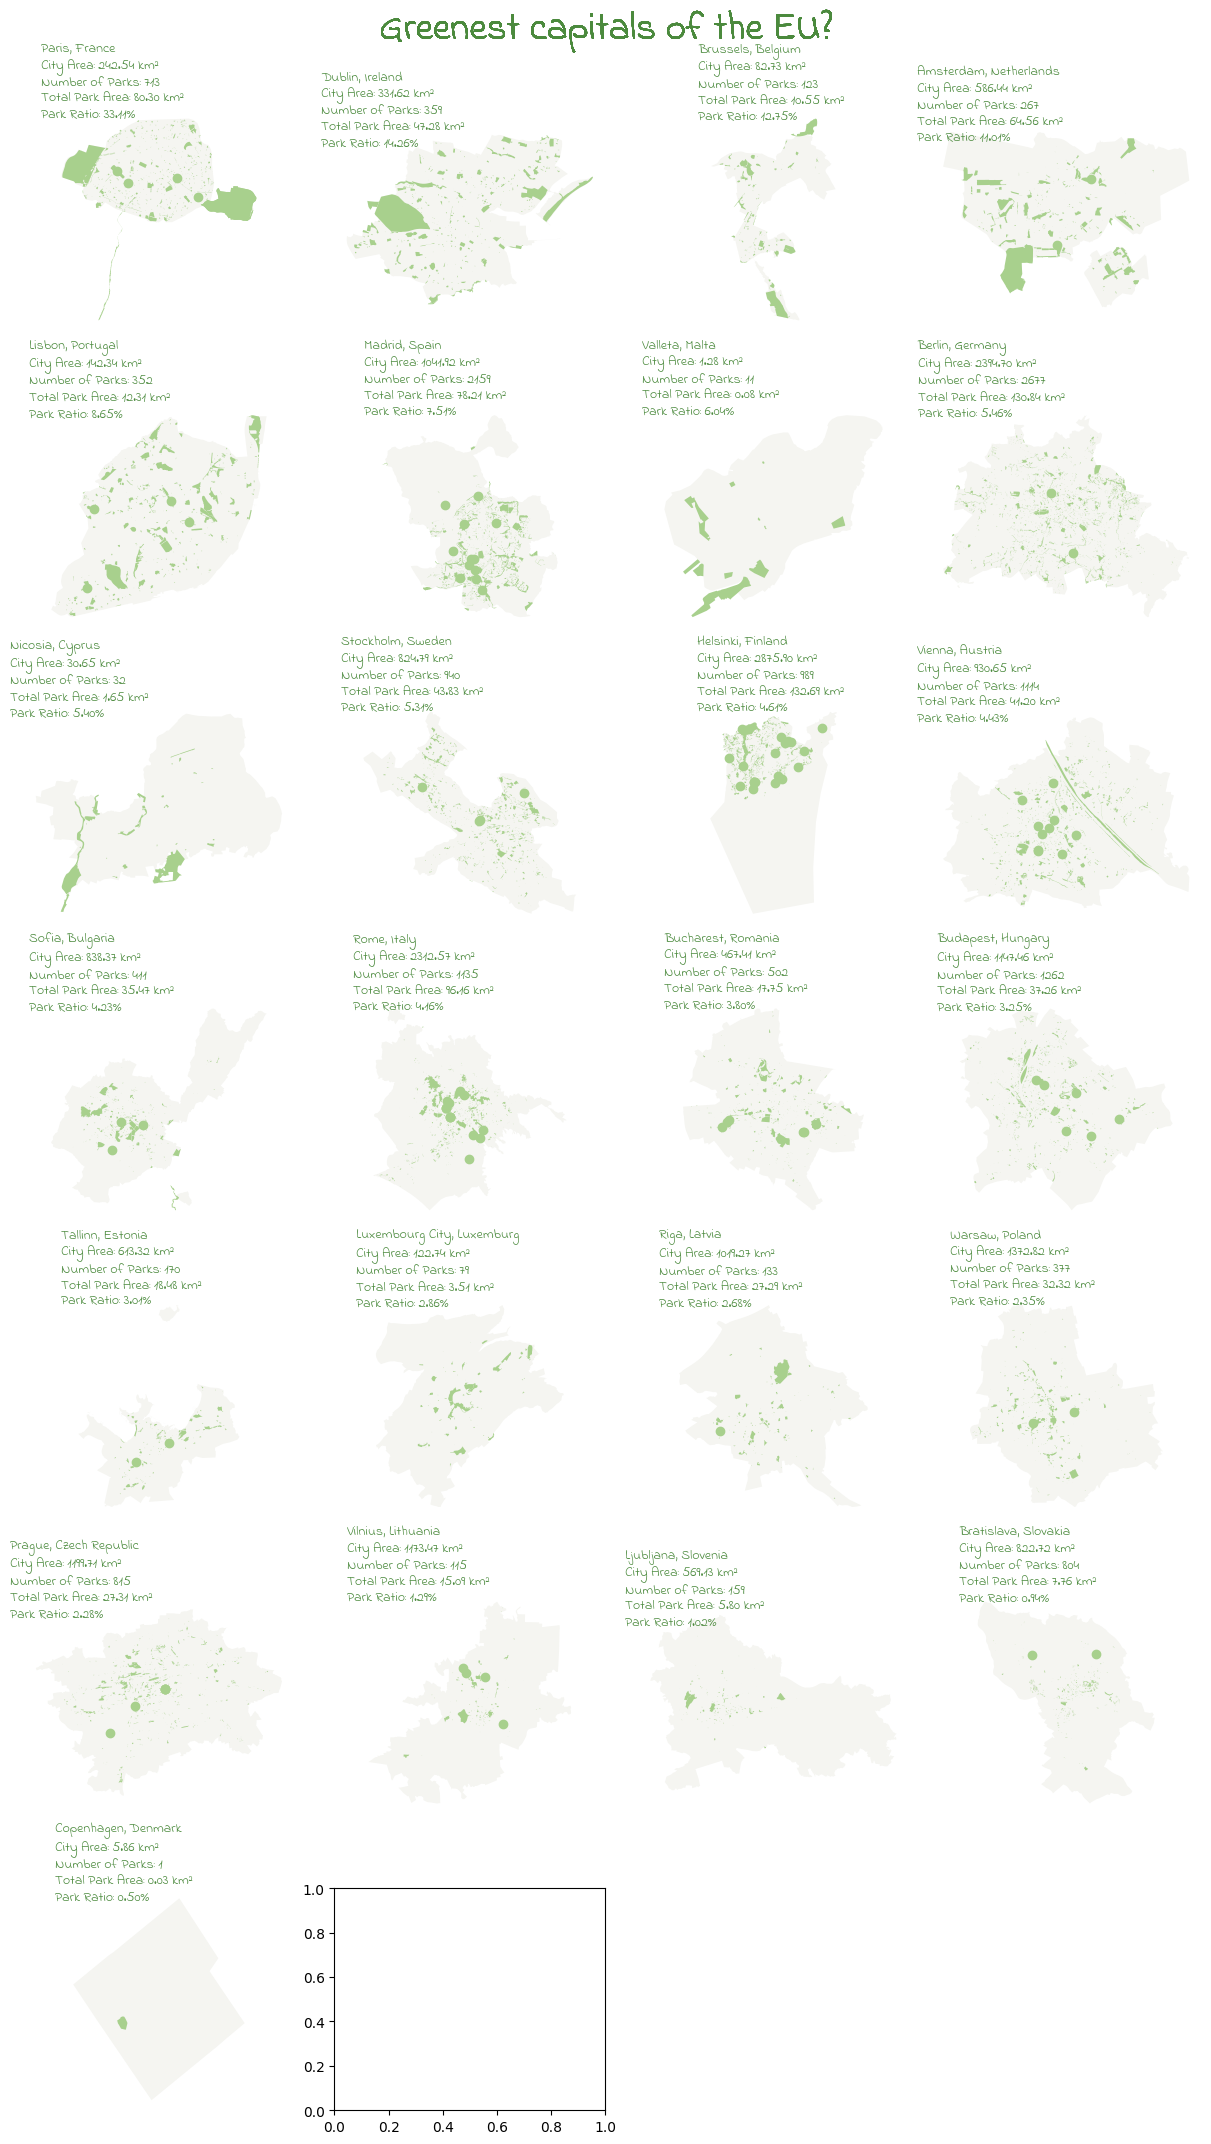

In [11]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

def plot_parks(city_list, cols=4): 
    city_data = []

    # Collect data for each city
    for city in city_list:
        try:
            # Get city boundary
            gdf_city = ox.geocode_to_gdf(city)
            gdf_city = gdf_city.to_crs(epsg=3395)  # Convert CRS for area calculation
            city_area_km2 = gdf_city.geometry.area.iloc[0] / 1e6  # Convert to km²

            # Get parks and filter by city boundary
            gdf_parks = ox.features_from_place(city, tags={"leisure": "park"})
            gdf_parks = gdf_parks.to_crs(epsg=3395)  # Convert CRS for area calculations
            #gdf_parks = gdf_parks[gdf_parks.geometry.intersects(gdf_city.geometry.iloc[0])]  # Filter parks

            # Compute park stats
            num_parks = len(gdf_parks)
            park_area_km2 = gdf_parks.geometry.area.sum() / 1e6  # Convert to km²
            park_ratio = park_area_km2 / city_area_km2 if city_area_km2 > 0 else 0  # Avoid division by zero

            city_data.append((city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio))

        except Exception as e:
            print(f"Error processing {city}: {e}")

    # Sort cities by park ratio (highest first)
    city_data.sort(key=lambda x: x[-1], reverse=True)

    # Determine grid layout
    num_cities = len(city_data)
    rows = (num_cities // cols) + (num_cities % cols > 0)  # Dynamic row calculation

    # Create figure and axes
    fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows), constrained_layout=True)
    axes = axes.flatten()  # Flatten to handle indexing easily

    skip_indices = [25, 28]

    for i, (city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio) in enumerate(city_data):
        
        if i in skip_indices:
            ax.axis("off")  
            continue
        
        ax = axes[i]

        # Plot city boundaries
        gdf_city.plot(ax=ax, facecolor="#f5f5f1")

        # Plot parks
        gdf_parks.plot(ax=ax, color="#A8D08D")

        # Add city info as text
        info_text = (
            f"{city}\n"
            f"City Area: {city_area_km2:.2f} km²\n"
            f"Number of Parks: {num_parks}\n"
            f"Total Park Area: {park_area_km2:.2f} km²\n"
            f"Park Ratio: {park_ratio:.2%}"
        )
        ax.text(-0.05, 1.3, s=info_text, font=font, color="#4B8A3D", weight="bold", va="top", transform=ax.transAxes)

        fig.text(0.5, 1.05, "Greenest capitals of the EU?", font=font, color="#4B8A3D", size=32, ha="center")
        
        ax.axis("off")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)    

    plt.show()

city_list = [
    "Vienna, Austria", 
    "Brussels, Belgium", 
    "Sofia, Bulgaria", 
    "Zagreb, Croatia", 
    "Nicosia, Cyprus", 
    "Prague, Czech Republic", 
    "Copenhagen, Denmark", 
    "Tallinn, Estonia", 
    "Helsinki, Finland", 
    "Paris, France", 
    "Berlin, Germany",  
    #"Athens, Greece", # Nominatim cannot geocode
    "Budapest, Hungary",  
    "Dublin, Ireland", 
    "Rome, Italy",  
    "Riga, Latvia", 
    "Vilnius, Lithuania", 
    "Luxembourg City, Luxemburg", 
    "Valleta, Malta", 
    "Amsterdam, Netherlands", 
    "Warsaw, Poland", 
    "Lisbon, Portugal",
    "Bucharest, Romania", 
    "Bratislava, Slovakia", 
    "Ljubljana, Slovenia", 
    "Madrid, Spain", 
    "Stockholm, Sweden" 
]

plot_parks(city_list, cols=4)  # Adjust `cols` as needed

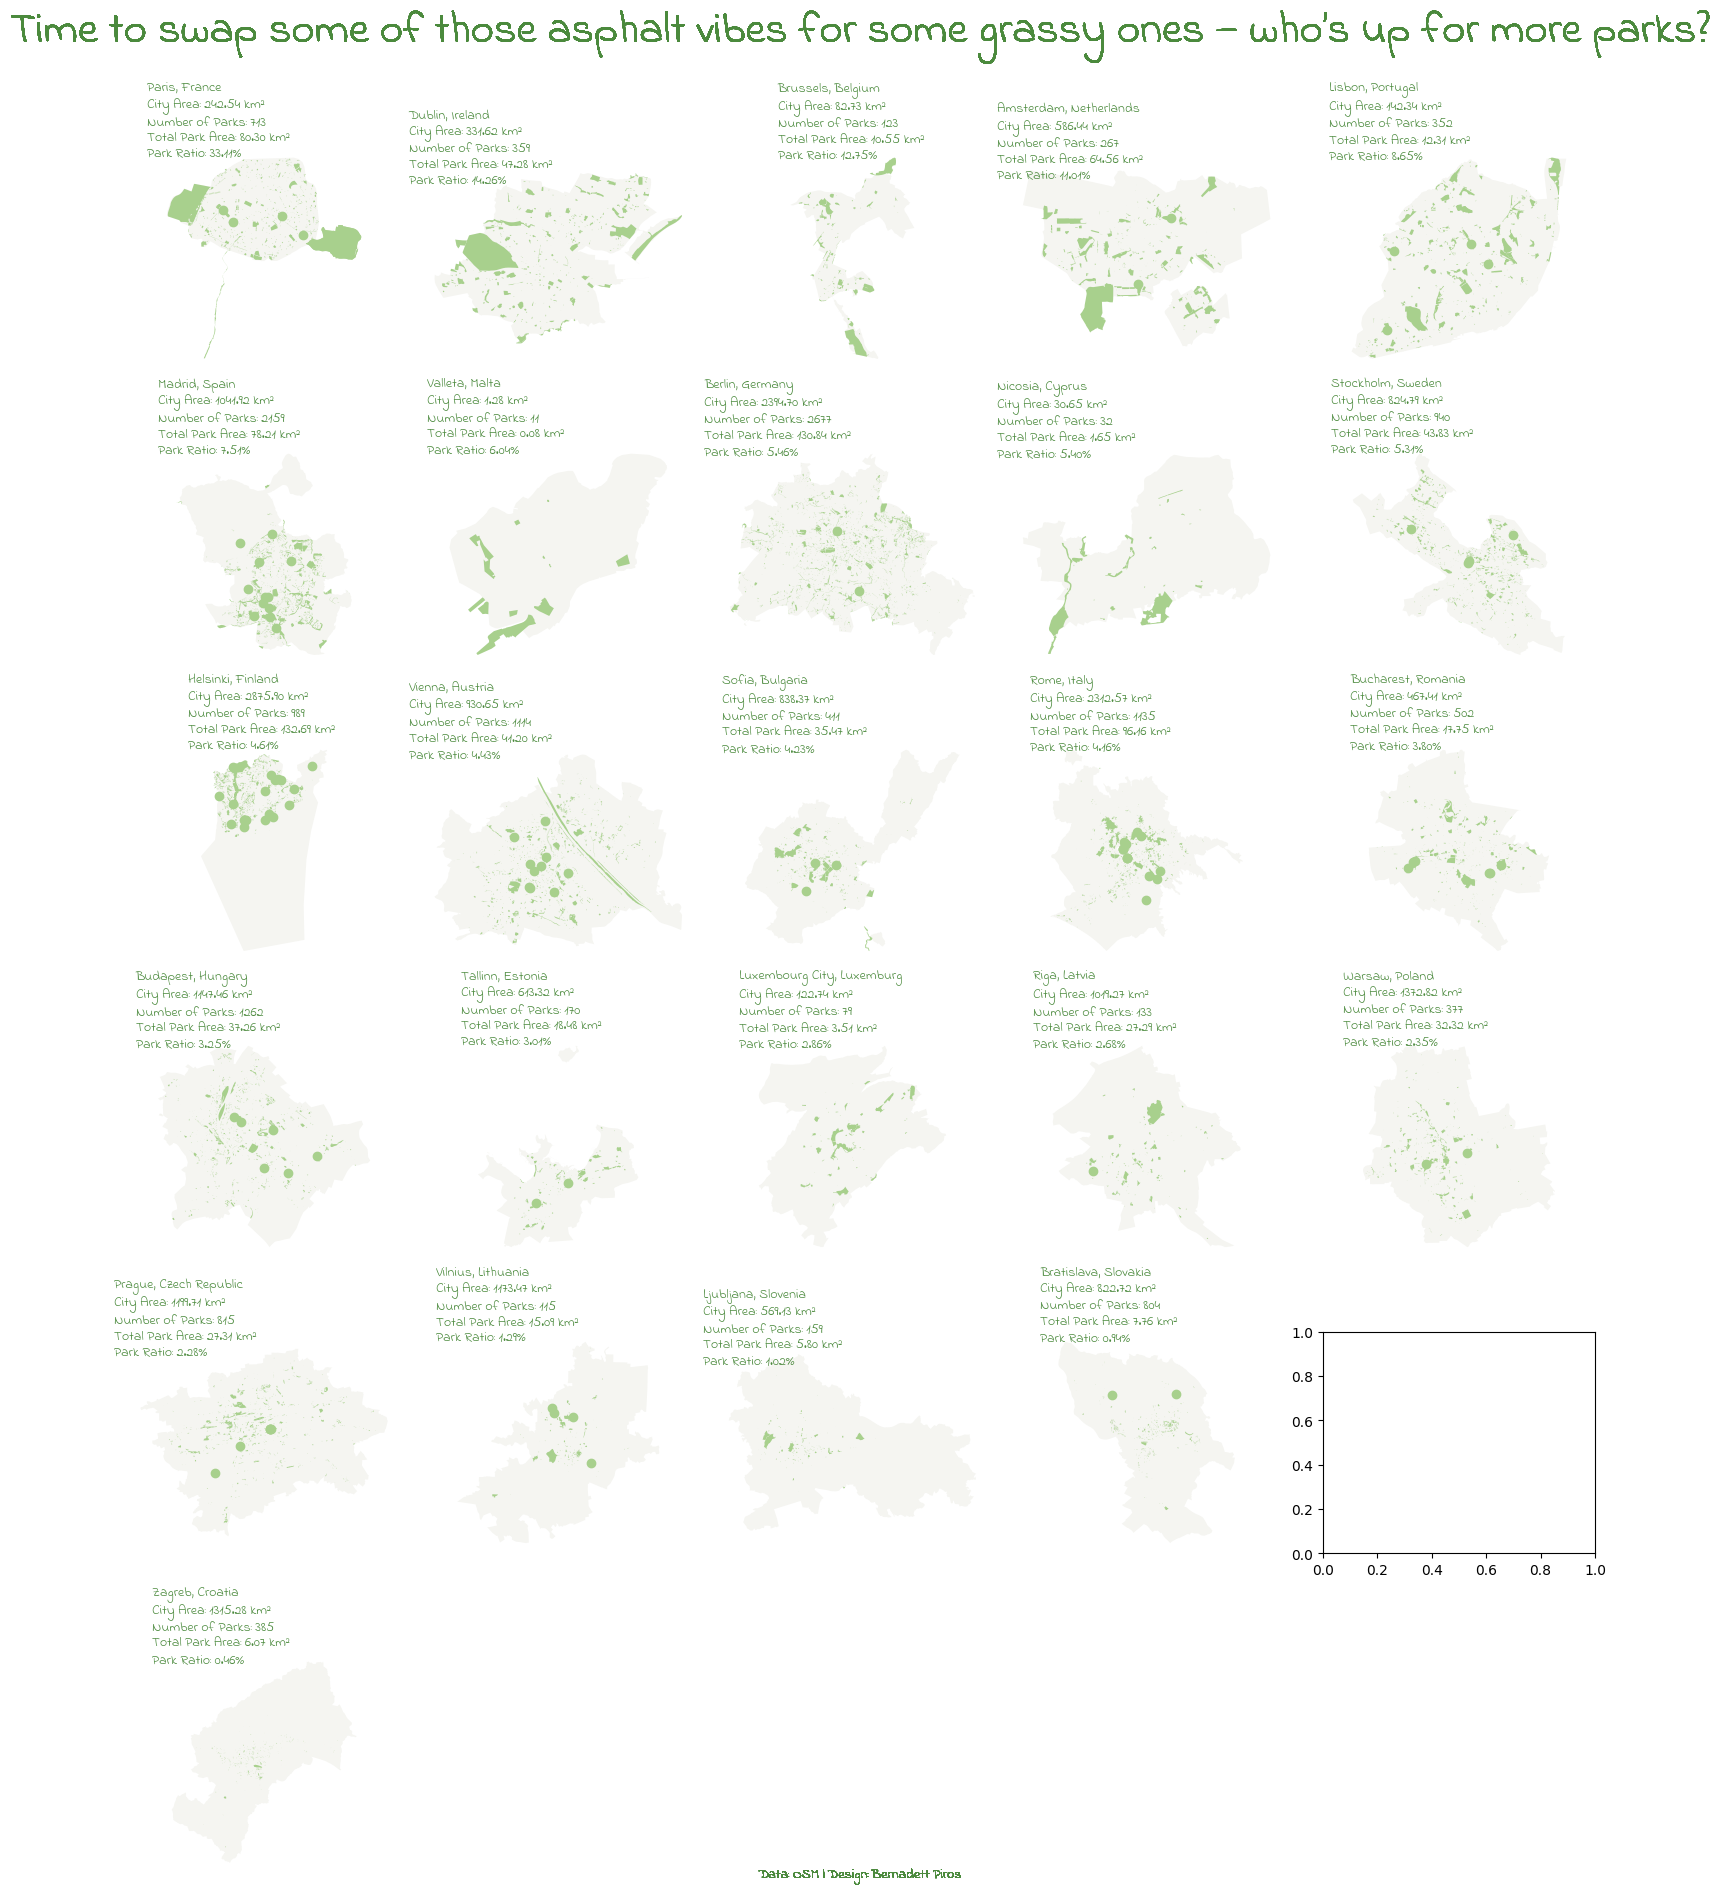

In [13]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

def plot_parks(city_list, cols=4): 
    city_data = []
    # Get data for each city
    for city in city_list:
        # Get city boundary
        gdf_city = ox.geocode_to_gdf(city)
        gdf_city = gdf_city.to_crs(epsg=3395)  
        city_area_km2 = gdf_city.geometry.area.iloc[0] / 1000000  

        # Get parks 
        gdf_parks = ox.features_from_place(city, tags={"leisure": "park"})
        gdf_parks = gdf_parks.to_crs(epsg=3395)  

        # Get park stats
        num_parks = len(gdf_parks)
        park_area_km2 = gdf_parks.geometry.area.sum() / 1000000 
        # Avoid division by zero
        park_ratio = park_area_km2 / city_area_km2 if city_area_km2 > 0 else 0  
        city_data.append((city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio))        

    # Sort cities descending by park ratio 
    city_data.sort(key=lambda x: x[-1], reverse=True)

    # Dynamic grid 
    num_cities = len(city_data)
    rows = (num_cities // cols) + (num_cities % cols > 0)  

    # Create figure and axes
    fig, axs = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows), constrained_layout=True)
    axs = axs.flatten()  

    skip_indices = [24, 27]

    for i, (city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio) in enumerate(city_data):     

        if i in skip_indices:
            ax.axis("off")  
            continue
            
        ax = axes[i]

        # Plot city boundaries
        gdf_city.plot(ax=ax, facecolor="#f5f5f1")

        # Plot parks
        gdf_parks.plot(ax=ax, color="#A8D08D")

        # Add text
        info_text = (
            f"{city}\n"
            f"City Area: {city_area_km2:.2f} km²\n"
            f"Number of Parks: {num_parks}\n"
            f"Total Park Area: {park_area_km2:.2f} km²\n"
            f"Park Ratio: {park_ratio:.2%}"
        )
        ax.text(-0.05, 1.3, s=info_text, font=font, color="#4B8A3D", weight="bold", va="top", transform=ax.transAxes)

        fig.text(0.5, 1.02, "Time to swap some of those asphalt vibes for some grassy ones — who’s up for more parks?",
                 font=font, color="#4B8A3D", size=32, ha="center")

        fig.text(0.5, 0, "Data: OSM | Design: Bernadett Piros", font=font, color="#4B8A3D", ha="center")
        
        ax.axis("off")

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)    

    plt.show()

city_list = [
    "Vienna, Austria", 
    "Brussels, Belgium", 
    "Sofia, Bulgaria", 
    "Zagreb, Croatia", 
    "Nicosia, Cyprus", 
    "Prague, Czech Republic", 
    "Copenhagen, Denmark", 
    "Tallinn, Estonia", 
    "Helsinki, Finland", 
    "Paris, France", 
    "Berlin, Germany",  
    #"Athens, Greece", # Nominatim cannot geocode
    "Budapest, Hungary",  
    "Dublin, Ireland", 
    "Rome, Italy",  
    "Riga, Latvia", 
    "Vilnius, Lithuania", 
    "Luxembourg City, Luxemburg", 
    "Valleta, Malta", 
    "Amsterdam, Netherlands", 
    "Warsaw, Poland", 
    "Lisbon, Portugal",
    "Bucharest, Romania", 
    "Bratislava, Slovakia", 
    "Ljubljana, Slovenia", 
    "Madrid, Spain", 
    "Stockholm, Sweden" 
]

plot_parks(city_list, cols=5)  

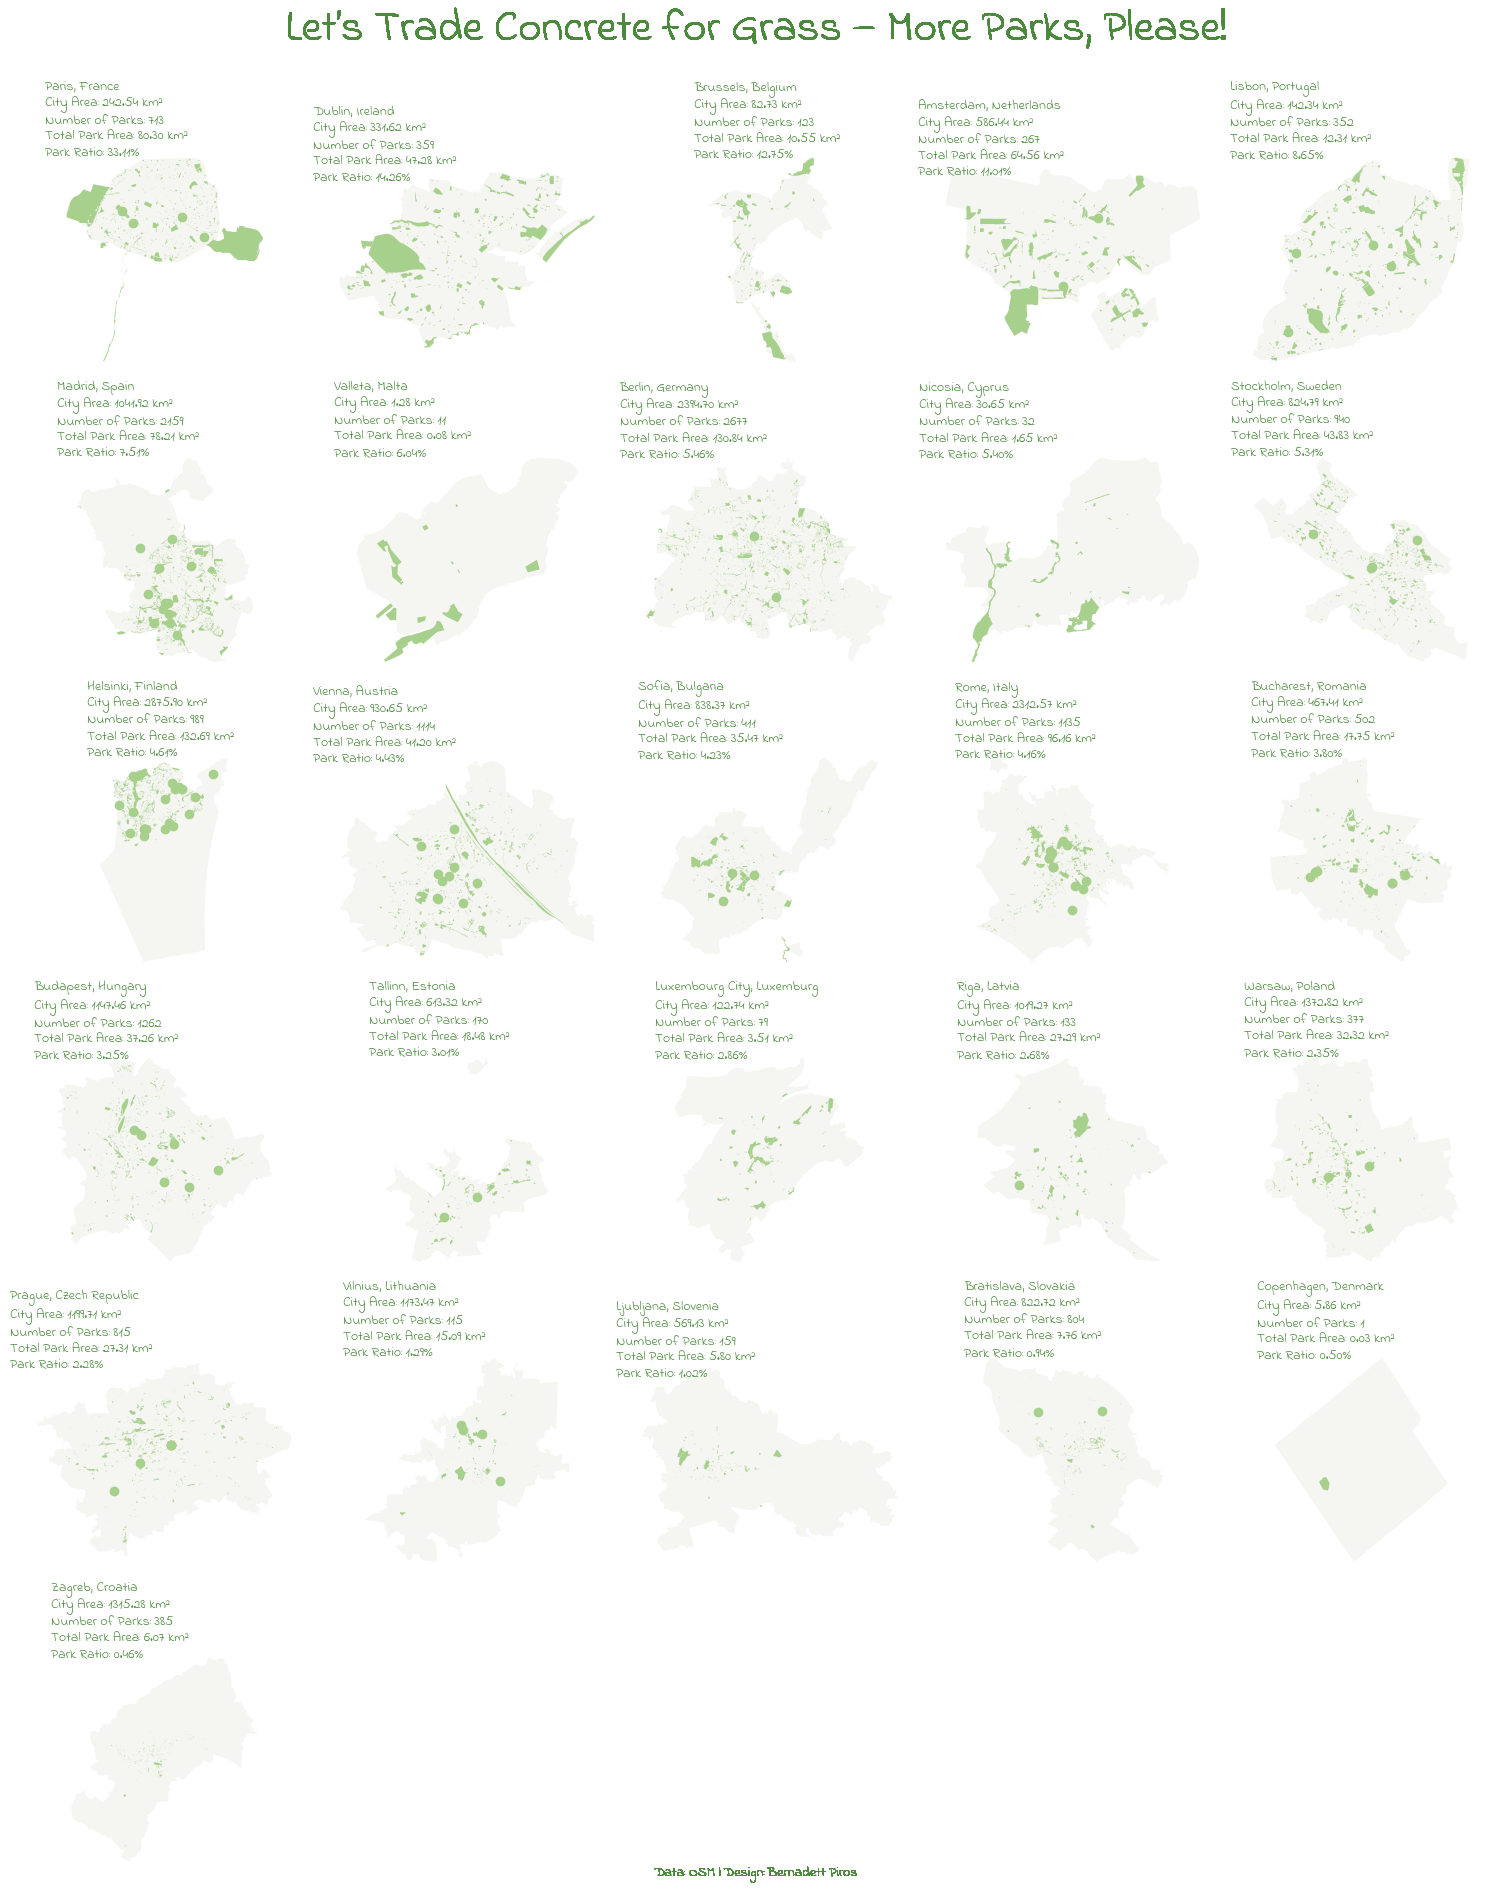

In [18]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

def plot_parks(city_list, cols=5): 
    city_data = []
    # Get data for each city
    for city in city_list:
        # Get city boundary
        gdf_city = ox.geocode_to_gdf(city)
        gdf_city = gdf_city.to_crs(epsg=3395)  
        city_area_km2 = gdf_city.geometry.area.iloc[0] / 1000000  

        # Get parks 
        gdf_parks = ox.features_from_place(city, tags={"leisure": "park"})
        gdf_parks = gdf_parks.to_crs(epsg=3395)  

        # Get park stats
        num_parks = len(gdf_parks)
        park_area_km2 = gdf_parks.geometry.area.sum() / 1000000 
        park_ratio = park_area_km2 / city_area_km2 
        city_data.append((city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio))        

    # Sort cities descending by park ratio 
    city_data.sort(key=lambda x: x[-1], reverse=True)

    # Dynamic grid 
    num_cities = len(city_data)
    rows = (num_cities // cols) + (num_cities % cols > 0)  

    # Create figure and axes
    fig, axs = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows), constrained_layout=True)
    axs = axs.flatten()      

    for i, (city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio) in enumerate(city_data):      
        ax = axs[i]

        # Plot city boundaries
        gdf_city.plot(ax=ax, facecolor="#f5f5f1")

        # Plot parks
        gdf_parks.plot(ax=ax, color="#A8D08D")

        # Add text
        info_text = (
            f"{city}\n"
            f"City Area: {city_area_km2:.2f} km²\n"
            f"Number of Parks: {num_parks}\n"
            f"Total Park Area: {park_area_km2:.2f} km²\n"
            f"Park Ratio: {park_ratio:.2%}"
        )
        ax.text(-0.05, 1.3, s=info_text, font=font, color="#4B8A3D", weight="bold", va="top", transform=ax.transAxes)

        fig.text(0.5, 1.02, "Let’s Trade Concrete for Grass — More Parks, Please!",
                 font=font, color="#4B8A3D", size=32, ha="center")

        fig.text(0.5, 0, "Data: OSM | Design: Bernadett Piros", font=font, color="#4B8A3D", ha="center")
        
        ax.axis("off")

    # Hide unused axes
    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)    

    plt.show()

    #plt.savefig("OSM_EU_capitals_parks", dpi=300, bbox_inches='tight', pad_inches=0.2)

city_list = [
    "Vienna, Austria", 
    "Brussels, Belgium", 
    "Sofia, Bulgaria", 
    "Zagreb, Croatia", 
    "Nicosia, Cyprus", 
    "Prague, Czech Republic", 
    "Copenhagen, Denmark", 
    "Tallinn, Estonia", 
    "Helsinki, Finland", 
    "Paris, France", 
    "Berlin, Germany",  
    #"Athens, Greece", # Nominatim cannot geocode
    "Budapest, Hungary",  
    "Dublin, Ireland", 
    "Rome, Italy",  
    "Riga, Latvia", 
    "Vilnius, Lithuania", 
    "Luxembourg City, Luxemburg", 
    "Valleta, Malta", 
    "Amsterdam, Netherlands", 
    "Warsaw, Poland", 
    "Lisbon, Portugal",
    "Bucharest, Romania", 
    "Bratislava, Slovakia", 
    "Ljubljana, Slovenia", 
    "Madrid, Spain", 
    "Stockholm, Sweden" 
]

plot_parks(city_list, cols=5)  